<a href="https://colab.research.google.com/github/dipplestix/online/blob/master/Copy_of_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3
In this problem set you will get some practice with gradient descent and sub-gradient descent. There is a template for setting up your code and plotting your results at the end of this notebook, which you may find useful. Note that it is only a suggestion -- you are not required to use it.

## Problem 1: Gradient Descent
Consider three quadratics, as given by:
$$
f_i(x) = \frac{1}{2} x^{\top}Q_ix + q_i^{\top} x + c_i,
$$
for the three triples $(Q_i,q_i,c_i)$, $i=1,2,3$ given below.

In [16]:
import numpy as np
Q1 = np.array([[ 1.17091573, -0.03686123, -0.1001259 ],
       [-0.03686123,  1.03835691,  0.17285956],
       [-0.1001259 ,  0.17285956,  1.06072736]])
Q2 = np.array([[ 15.27095759,  -1.97915834, -14.22190153],
       [ -1.97915834,   0.34660759,   1.91586927],
       [-14.22190153,   1.91586927,  15.76943482]])
Q3 = np.array([[28.59657006,  0.3684004 ,  0.90750259],
       [ 0.3684004 , 28.11480924,  0.81866989],
       [ 0.90750259,  0.81866989, 28.7886207 ]])
q1 = np.array([-4.68686663, -0.89027884, -1.57340281])
q2 = np.array([ 6.75973216,  1.23223936, -0.87956749])
q3 = np.array([ 0.8684369 , -4.69970837, -1.09690726])
c1 = 1.61888566;
c2 = -2.66426693;
c3 = 0.84184738;


### Part (A)
Implement gradient descent with a step-size of $0.1$ for all three quadratics, and plot function value versus iteration number. Explain what you see.

The solutions here incorporate the graphs for part B and D as well. Text responses will be in the corresponding sections though

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class GradDesc:
    def __init__(self, Q, q, c, eta, btls=False):
        self.x = np.full(len(q), 0.0)
        self.Q = Q
        self.q = q
        self.c = c
        self.eta = eta
        self.values = [self.get_value()]
        self.btls = btls
        self.alpha = .499

    def get_value(self, x=None):
        if x is None:
            return .5*np.matmul(np.matmul(np.transpose(self.x), self.Q), self.x) + np.matmul(np.transpose(self.q), self.x) + self.c
        else:
            return .5*np.matmul(np.matmul(np.transpose(x), self.Q), x) + np.matmul(np.transpose(self.q), x) + self.c


    def get_grad(self):
        return np.matmul(self.Q, self.x) + self.q

    def step(self):
        if self.btls is False:
            self.x = self.x - self.eta*self.get_grad()
        else:
            step = 10
            par = self.get_grad()
            x = self.x - step*par
            while(self.get_value(x)) > self.get_value() - self.alpha*step*np.matmul(np.transpose(par), par):
                step *= .95
                x = self.x - step*par
            self.x = self.x - step*par
        self.values.append(self.get_value())


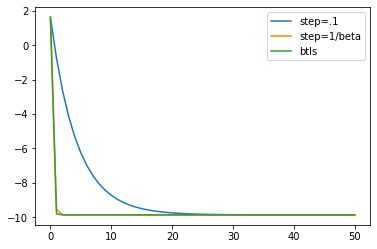

In [18]:
a = GradDesc(Q1, q1, c1, .1)
e1 = 1/max(np.linalg.eig(Q1)[0])
b = GradDesc(Q1, q1, c1, e1)
c = GradDesc(Q1, q1, c1, e1, btls=True)
for _ in range(50):
    a.step()
    b.step()
    c.step()
plt.plot(a.values)
plt.plot(b.values)
plt.plot(c.values)
plt.legend(['step=.1', 'step=1/beta', 'btls'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul


/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


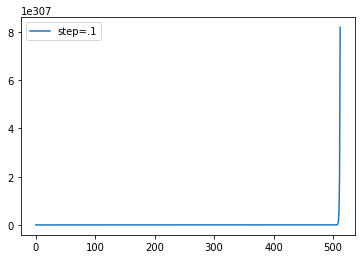

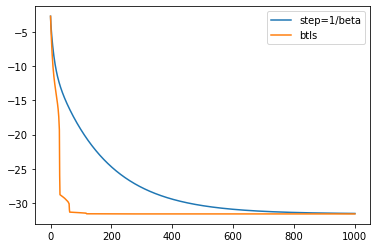

In [19]:
a = GradDesc(Q2, q2, c2, .1)
e2= 1/max(np.linalg.eig(Q2)[0])
b = GradDesc(Q2, q2, c2, e2)
c = GradDesc(Q2, q2, c2, e2, btls=True)
for _ in range(1000):
    a.step()
    b.step()
    c.step()
fig1 = plt.figure()
plt.plot(a.values)
plt.legend(['step=.1'])
fig2 = plt.figure()
plt.plot(b.values)
plt.plot(c.values)
plt.legend(['step=1/beta', 'btls'])

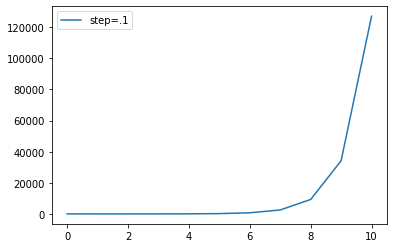

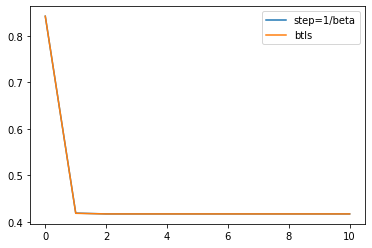

In [20]:
a = GradDesc(Q3, q3, c3, .1)
e3= 1/max(np.linalg.eig(Q3)[0])
b = GradDesc(Q3, q3, c3, e3)
c = GradDesc(Q3, q3, c3, e3, btls=True)
for _ in range(10):
    a.step()
    b.step()
    c.step()
fig1 = plt.figure()
plt.plot(a.values)
plt.legend(['step=.1'])
fig2 = plt.figure()
plt.plot(b.values)
plt.plot(c.values)
plt.legend(['step=1/beta', 'btls'])

# BLTS and eta=1/beta both converge in one step

### Part (B)
Find a step-size for each quadratic (it can be different for each), and implement gradient descent with this stepsize. Plot function value versus iteration number. Try to pick a step size that gives you fast convergence. How did you pick it?

The step size for each quadratic should be selected to be 1/beta, the lipschitz smoothness factor. This is found by taking the maximum eigen value of Q for each



In [21]:
print([e1, e2, e3])

[0.7692307699562937, 0.03333333333469096, 0.03333333333500338]


### Part (C)
Even with your carefully tuned choice of step size, you will see that the rates of convergence are not the same, Explain why this is the case.

The more strongly convex a function is, the faster the GD will converge. The smallest eigenvalue of each Q is how strongly convex it is (and Q3 is much more convex than the other two). The distance between the initial conditions and the optimal solution can also impact speed of convergence

In [24]:
a1= min(np.linalg.eig(Q1)[0])
a2= min(np.linalg.eig(Q2)[0])
a3= min(np.linalg.eig(Q3)[0])
print([a1, a2, a3])

[0.870000001582961, 0.08700000145750277, 27.499999998702602]


### Part (D) -- Optional -- 
Read about back tracking line search (BTLS) and implement it here. 

See implementation above

## Problem 2: Sub-gradient Method
Consider a least squares problem with $\ell^1$ regularization:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

This problem is often called LASSO (least absolute shrinkage and selection operator) and is known to induce {\em sparse} solutions with few nonzero elements in $x$, which can have advantages in terms of computation and interpretability. This problem is nonsmooth due to the regularization term. It is also not strongly convex when $A$ has more columns than rows. We (i.e., you) will solve this problem using several different algorithms in this class. We start with what we have seen thus far: the subgradient method. 

The dataset represented in the matrices provided in the numpy binary files A.npy and b.npy are from a diabetes dataset (scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) with 10 features that has been corrupted with an additional 90 noisy features. Thus a sparse solution should be very effective. Below you will find some skeleton code to help with loading the data, running the algorithm and plotting the results. Don't use stock optimization code, you should develop the core part of this assignment yourself.

Minimize $f(x)$ using $10^4$ iterations of the subgradient method starting with $t=0$ and $x_0 =0$. 

### Part (A)
Use a decreasing step size of $\eta_t = c/t$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (B) 
Now use a more slowly decreasing step size of $\eta_t = c/\sqrt{t+1}$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (C)
Now try to find the best fixed step size. Plot the results and compare to the decreasing step size you see above. 

### Part (D) -- Optional --
If you did the BTLS optional part above, either implement BTLS for subgradient method, or explain why the challenges are with this. 


Here is a template that may be useful. Note that it is designed for the LASSO problem, so you will have to modify it to use it for the quadratic problems at the beginning, but the ideas are the same.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


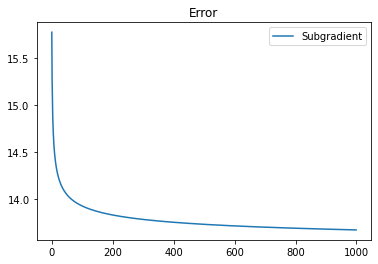

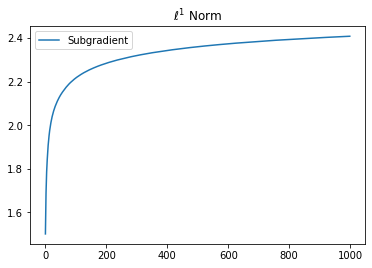

In [33]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time


def subgradient(x, A, b, t, lam, c=1e-3):
    x -= c/(t+1)*(np.matmul(np.matmul(A.transpose(), A), x) - np.matmul(A.transpose(), b) + lam*np.sign(x))
    return x

def descent(update, A, b, reg, T=int(1e4), c=1e-4):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg, c)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    for c in [5e-4]:
      #Tried a bunch of values for c, this got the best results in this T
      #As you increase reg, you (obviously) decrease the l_1 norm and increase the SSE error.
      x_sg, error_sg, l1_sg = descent(subgradient, A, b, reg=4., T=T, c=c)

      fig1 = plt.figure()
      plt.clf()
      plt.plot(error_sg, label='Subgradient')
      plt.title('Error')
      plt.legend()
      plt.plot()
      #plt.savefig('error.eps')

      fig2 = plt.figure()
      plt.clf()
      plt.plot(l1_sg, label='Subgradient')
      plt.title("$\ell^1$ Norm")
      plt.legend()
      plt.savefig('l1.eps')


main()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


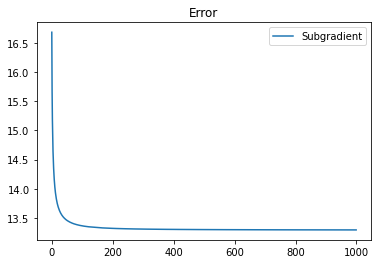

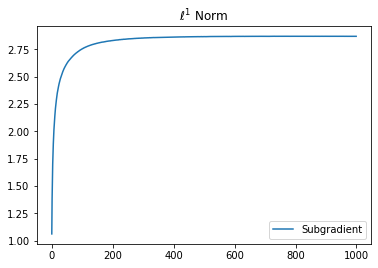

In [36]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time


def subgradient(x, A, b, t, lam, c=1e-3):
    x -= c/np.sqrt(t+2)*(np.matmul(np.matmul(A.transpose(), A), x) - np.matmul(A.transpose(), b) + lam*np.sign(x))
    return x

def descent(update, A, b, reg, T=int(1e4), c=1e-4):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg, c)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    for c in [5e-4]:
      #Tried a bunch of values for c, this got the best results in this T
      #As you increase reg, you (obviously) decrease the l_1 norm and increase the SSE error.
      x_sg, error_sg, l1_sg = descent(subgradient, A, b, reg=4., T=T, c=c)

      fig1 = plt.figure()
      plt.clf()
      plt.plot(error_sg, label='Subgradient')
      plt.title('Error')
      plt.legend()
      plt.plot()
      #plt.savefig('error.eps')

      fig2 = plt.figure()
      plt.clf()
      plt.plot(l1_sg, label='Subgradient')
      plt.title("$\ell^1$ Norm")
      plt.legend()
      plt.savefig('l1.eps')


main()



Having a slower decreasing step size increases the speed of convergence (since it has larger steps at the beginning) and still nicely converges.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


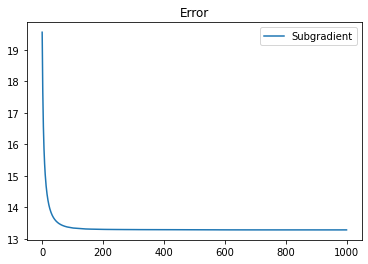

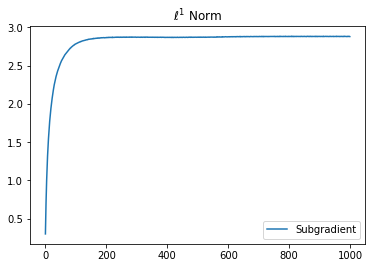

In [39]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time


def subgradient(x, A, b, t, lam, c=1e-3):
    x -= c*(np.matmul(np.matmul(A.transpose(), A), x) - np.matmul(A.transpose(), b) + lam*np.sign(x))
    return x

def descent(update, A, b, reg, T=int(1e4), c=1e-4):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg, c)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    for c in [1e-4]:
      #Tried a bunch of values for c, this got the best results in this T
      #As you increase reg, you (obviously) decrease the l_1 norm and increase the SSE error.
      x_sg, error_sg, l1_sg = descent(subgradient, A, b, reg=4., T=T, c=c)

      fig1 = plt.figure()
      plt.clf()
      plt.plot(error_sg, label='Subgradient')
      plt.title('Error')
      plt.legend()
      plt.plot()
      #plt.savefig('error.eps')

      fig2 = plt.figure()
      plt.clf()
      plt.plot(l1_sg, label='Subgradient')
      plt.title("$\ell^1$ Norm")
      plt.legend()
      plt.savefig('l1.eps')


main()

Converges to close to optimal faster, but without a decreasing step size, it settles at a bit higher of an overall value for the function.

Part D

Since the subgradient is not necessarily a direction of descent, we don't get a guarantee about how the function behaves in the direction we choose as a gradient, so we don't get the same guarantee we see in the BTLS while loop.